In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os

In [2]:
res_dir = '../output/sentipolc/'

In [3]:
def get_model_dirs(res_dir, model_name):
    return [os.path.join(res_dir, dir_name) for dir_name in os.listdir(res_dir) if model_name in dir_name]

In [4]:
def get_results(src_dir):
    res_path = os.path.join(src_dir, 'all_results.json')
    with open(res_path, 'r') as res_file:
        res = json.load(res_file)
    return res

In [5]:
def get_plot_label(src_dir):
    dir_name = src_dir.split('/')[-1]
    splitted_dir_name = dir_name.split('_')
    if 'it' in splitted_dir_name:
        splitted_dir_name.remove('it')
    elif 'en' in splitted_dir_name:
        splitted_dir_name.remove('en')
    pretrained = 'pretrained' if splitted_dir_name[1] == 'p' else 'not_pretrained'
    finetuned = 'finetuned' if splitted_dir_name[2] == 'f' else 'not_finetuned'
    if finetuned == 'finetuned':
        finetuned += f'_user_{splitted_dir_name[-1][2:]}'
    return f'{pretrained}_{finetuned}'

In [6]:
def filter_results_metrics(results):
    filtered_metrics = []
    all_metrics = list(results.keys())
    for metric in all_metrics:
        if 'test' in metric:
            if 'second' not in metric and 'step' not in metric and 'runtime' not in metric and 'loss' not in metric and 'smape' not in metric:
                filtered_metrics.append(metric)
    return filtered_metrics

In [7]:
def create_res_df(all_model_dirs):
    results = {'model':[]}
    for src_dir in all_model_dirs:
        model_res = get_results(src_dir)
        label = get_plot_label(src_dir)
        for metric in filter_results_metrics(model_res):
            if metric not in results:
                results[metric] = []
            results[metric].append(model_res[metric])
        results['model'].append(label)
    res_df = pd.DataFrame.from_dict(results)
    res_df.set_index('model', inplace=True)
    res_df = res_df.sort_index(ascending=True)
    return res_df

In [8]:
model_name = 'camem'
all_model_dirs = get_model_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

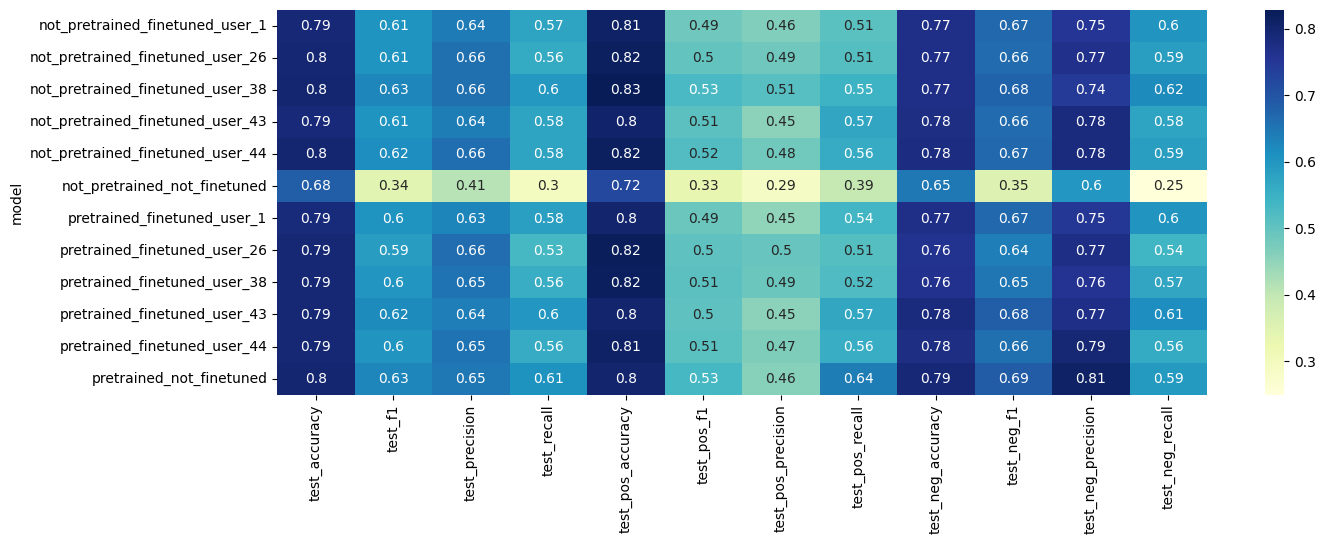

In [9]:
plt.figure(figsize=(15, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [10]:
model_name = 'xlm'
all_model_dirs = get_model_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

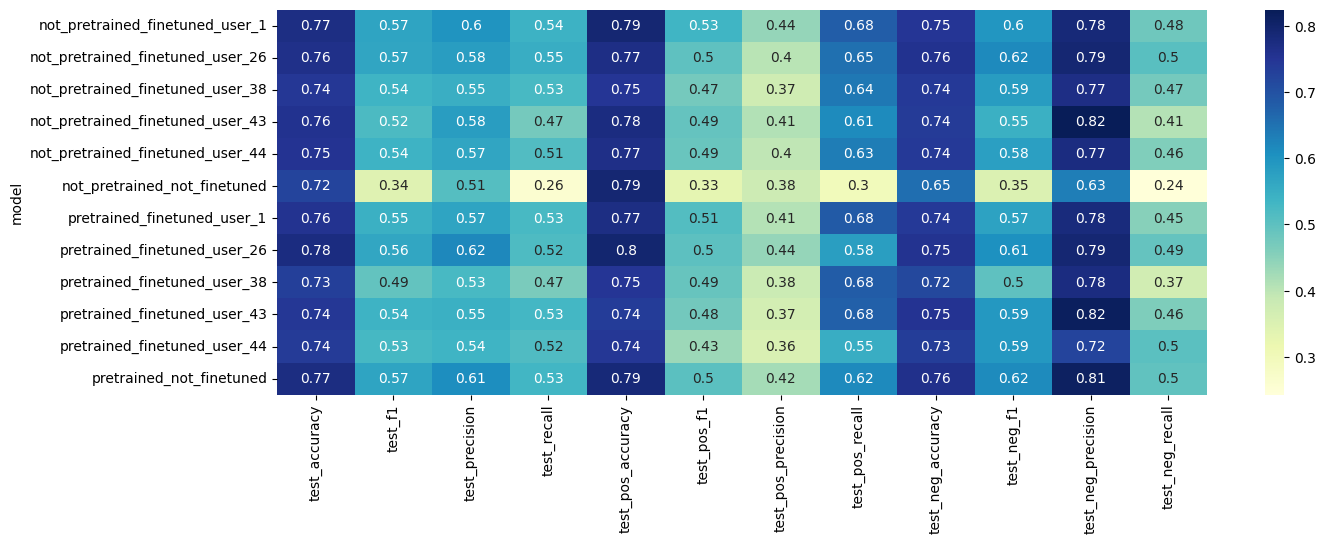

In [11]:
plt.figure(figsize=(15, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [12]:
res_dir = '/home/lmoroni/__workdir/augmenting_nlms_meco/output/sst2'

In [13]:
model_name = 'xlm'
all_model_dirs = get_model_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

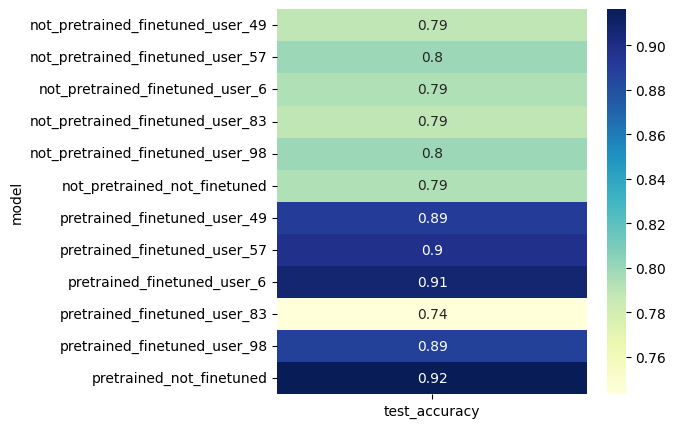

In [14]:
plt.figure(figsize=(5, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [15]:
model_name = 'roberta'
all_model_dirs = get_model_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

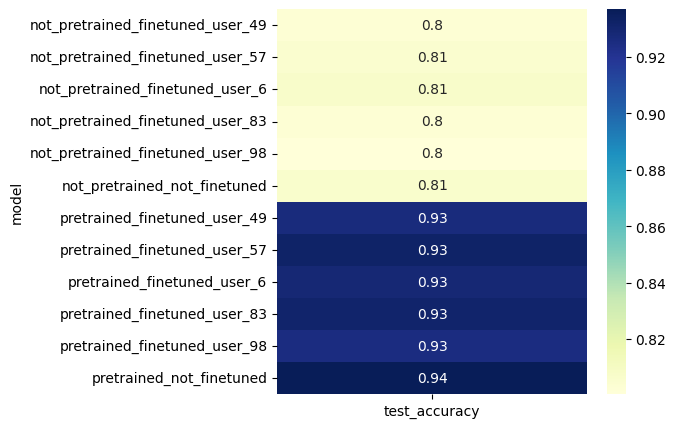

In [16]:
plt.figure(figsize=(5, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [17]:
def get_complexity_models_dirs(src_dir, model_name):
    if model_name == 'xlm_it':
        m_string = 'xlm'
        l_string = 'it'
    elif model_name == 'xlm_en':
        m_string = 'xlm'
        l_string = 'en'
    elif model_name == 'camem':
        m_string = 'camem'
        l_string = ''
    elif model_name == 'roberta':
        m_string = 'roberta'
        l_string = ''
    dir_names = [dir_name for dir_name in os.listdir(src_dir) if m_string in dir_name and l_string in dir_name] 
    return [os.path.join(src_dir, dir_name) for dir_name in dir_names]

In [18]:
res_dir = '/home/lmoroni/__workdir/augmenting_nlms_meco/output/complexity'

In [19]:
model_name = 'roberta'
all_model_dirs = get_complexity_models_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

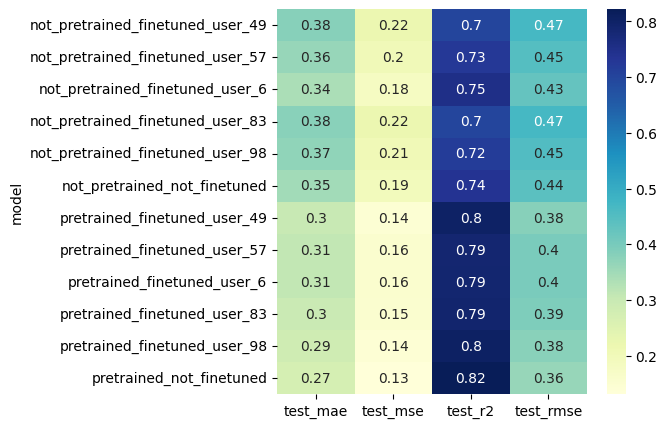

In [20]:
plt.figure(figsize=(5, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [21]:
model_name = 'xlm_en'
all_model_dirs = get_complexity_models_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

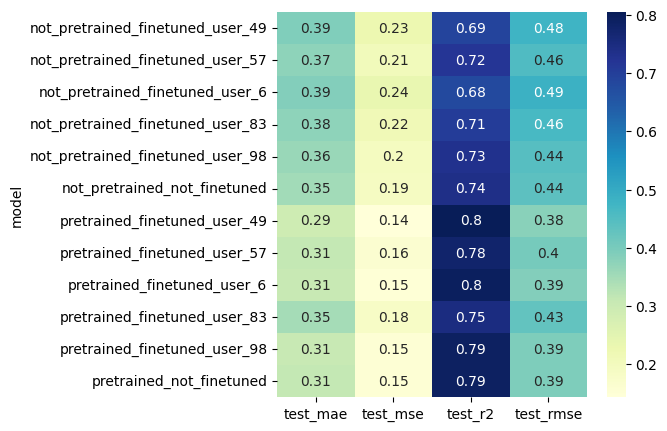

In [22]:
plt.figure(figsize=(5, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [23]:
model_name = 'camem'
all_model_dirs = get_complexity_models_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

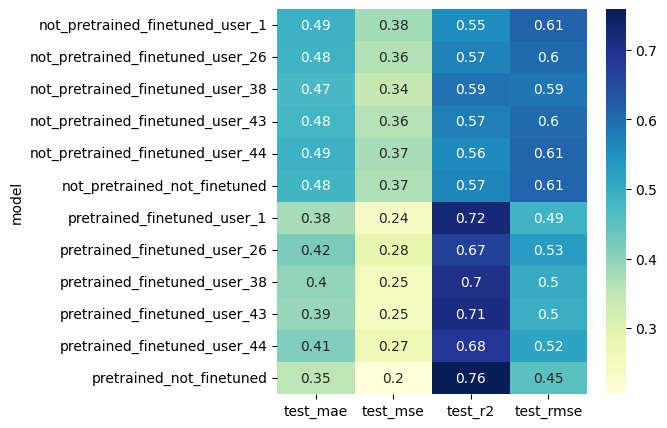

In [24]:
plt.figure(figsize=(5, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');

In [25]:
model_name = 'xlm_it'
all_model_dirs = get_complexity_models_dirs(res_dir, model_name)
res_df = create_res_df(all_model_dirs)

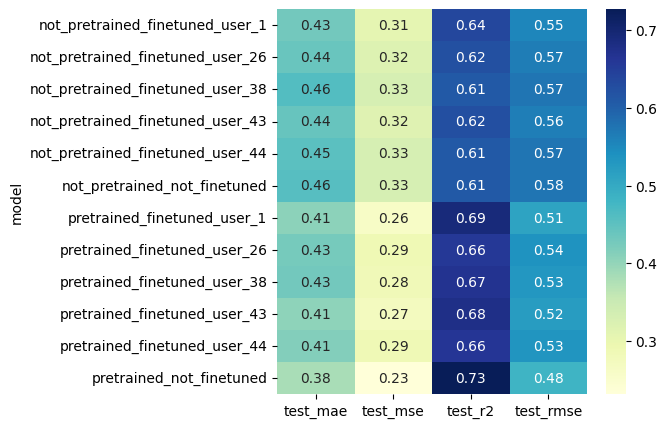

In [26]:
plt.figure(figsize=(5, 5))
sns.heatmap(res_df, annot=True, cmap='YlGnBu');